# Abstract:
Competitiveness, market share, professional development and personal support to community action, health, culture, education and sport,
 are linked to a promising new market. Coupled with the development of organizations, the pressure to achieve goals more audacious, 
employees increasingly overwhelmed, they end up buying some disturbance in the health-related type of labor activity. 
The objective of this paper is to apply a neuro fuzzy network in the prediction of absenteeism at work. 
To make the database were collected records of absenteeism from work during the period of July/07 to July/2010 in a Courier company. 
Absences certified with the International Classification of Diseases were stratified into 21 categories, the data were tabulated and 
filtered in MS Excel software. A neuro fuzzy network was developed using an artificial neural network architecture multilayer perceptron
 with the error backpropagation algorithm. This paper presents partial results of the use of neuro fuzzy network to predict absenteeism 
at work.

Above is some details about the data and how it was gathered and how the researchers used methods like fuzzy methods to predict absenteeism at work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_all=pd.read_csv('D:\\iNeuron\\Intership_1\\Absenteeism_at_work_AAA\\Absenteeism_at_work.csv',sep=';')

In [3]:
df_all.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df_all.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
df_all['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [6]:
#Number of reasons for absensce
len(df_all['Reason for absence'].unique())

28

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [8]:
df_all['ID'].unique()

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16,
        4, 35], dtype=int64)

In [9]:
#Number of people in the sample
len(df_all['ID'].unique())

36

In [10]:
df_all['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [11]:
#Number of unique months in sample
len(df_all['Month of absence'].unique())

13

In [12]:
df_all['Month of absence'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0], dtype=int64)

In [13]:
#number of unique days
len(df_all['Day of the week'].unique())

5

In [14]:
#number of seasons
len(df_all['Seasons'].unique())

4

In [15]:
#sample check for a person

df_all[df_all['ID']==2]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
31,2,18,8,5,1,235,29,12,48,205.917,...,0,1,1,0,1,5,88,163,33,8
33,2,18,8,2,1,235,29,12,48,205.917,...,0,1,1,0,1,5,88,163,33,8
38,2,28,8,6,1,235,29,12,48,205.917,...,0,1,1,0,1,5,88,163,33,8
203,2,0,4,2,3,235,29,12,48,326.452,...,1,1,1,0,1,5,88,163,33,0
469,2,23,7,2,1,235,29,12,48,230.290,...,0,1,1,0,1,5,88,163,33,1
714,2,0,6,2,3,235,29,12,48,275.089,...,1,1,1,0,1,5,88,163,33,0


In [16]:
#checking the reason occured most in this data
df_all['Reason for absence'].mode()

0    23
dtype: int64

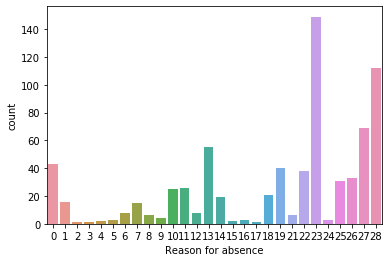

In [17]:
sn.countplot(df_all['Reason for absence'])

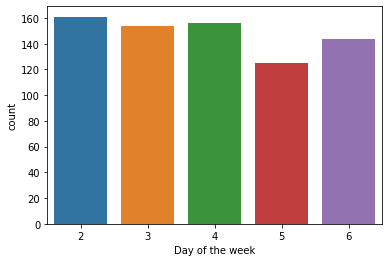

In [18]:
#checking the days that occured most in this data
sn.countplot(df_all['Day of the week'])

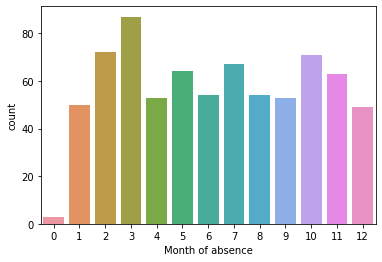

In [19]:
#checking the months that occured most in this data
sn.countplot(df_all['Month of absence'])

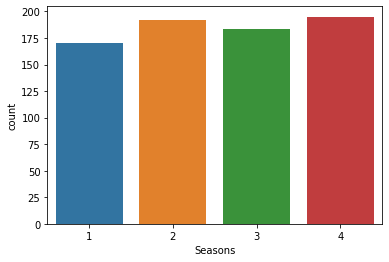

In [20]:
#checking the seasons that occured most in this data
sn.countplot(df_all['Seasons'])

In [21]:
#Checking if no reason given a displinary action
df_all[df_all['Disciplinary failure']==1]['Reason for absence'].value_counts()

0    40
Name: Reason for absence, dtype: int64

Above shows  when leave taken without any resason , discplinary action taken.

C:\Users\subra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


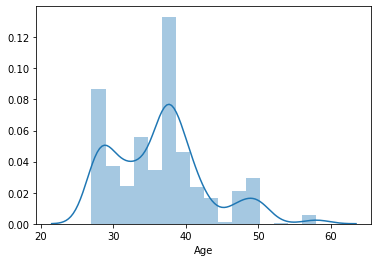

In [22]:
#Checking the Age in the data
sn.distplot(df_all['Age'])

In [23]:
df_all['Age'].describe()

count    740.000000
mean      36.450000
std        6.478772
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64

In [24]:
df_all['Age'].mode()

0    28
dtype: int64

In [25]:
df_all['Age'].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [26]:
#Lets check some ID
df_all[df_all['ID']==3].head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
13,3,11,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
14,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,4
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


In [27]:
df_all[df_all['ID']==3].shape

(113, 21)

In [28]:
#creating a subset data for ID=3
df_3=df_all[df_all['ID']==3].copy()

In [29]:
df_3.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
13,3,11,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
14,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,4
16,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2


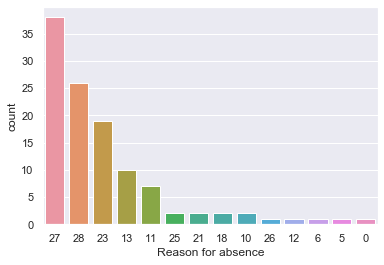

In [30]:
#checking for frequent reasons for person 3
sn.set()
sn.countplot(df_3['Reason for absence'],order=df_3['Reason for absence'].value_counts().index)
plt.show()

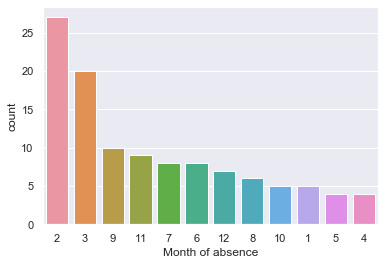

In [31]:
#checking for if any months where  person 3 was absent
sn.set()
sn.countplot(df_3['Month of absence'],order=df_3['Month of absence'].value_counts().index)
plt.show() 

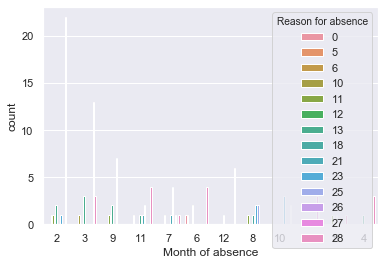

In [32]:
sn.set()
sn.countplot(df_3['Month of absence'],hue=df_3['Reason for absence'],order=df_3['Month of absence'].value_counts().index)
plt.show() 

In [33]:
#Checking for data in month 2
df_3[df_3['Month of absence']==2]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
139,3,11,2,4,2,179,51,18,38,302.585,...,0,1,0,1,0,0,89,170,31,8
370,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
374,3,23,2,6,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
375,3,27,2,2,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,2
376,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
377,3,10,2,5,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,8
379,3,27,2,6,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
381,3,27,2,2,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
385,3,27,2,4,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3
386,3,27,2,6,2,179,51,18,38,251.818,...,0,1,0,1,0,0,89,170,31,3


In [34]:
df_3[df_3['Month of absence']==2]['Reason for absence'].value_counts()

27    22
13     2
23     1
11     1
10     1
Name: Reason for absence, dtype: int64

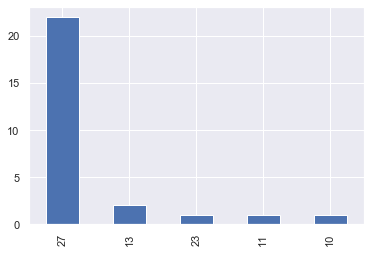

In [35]:
df_3[df_3['Month of absence']==2]['Reason for absence'].value_counts().plot(kind='bar')

In [36]:
df_3['Month of absence'].value_counts()

2     27
3     20
9     10
11     9
7      8
6      8
12     7
8      6
10     5
1      5
5      4
4      4
Name: Month of absence, dtype: int64

In [37]:
df_3.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

Seeing only the numbers in analysis is not giving much insight, so we create dataframes where respective code details can be seen.


In [38]:
#For education
ed={'Education_no':[1,2,3,4],'Education_Values':['high school','graduate','postgraduate','master and doctor']}
df_ed=pd.DataFrame(ed,columns=['Education_no','Education_Values'])

In [39]:
df_ed

,Education_no,Education_Values
0,1,high school
1,2,graduate
2,3,postgraduate
3,4,master and doctor


In [40]:
#For absent reason we have have kept the data in excel and will import as dataframe
#Few absense reasons are refined and made shorter for easier representation.
df_reason=pd.read_excel('D:\\iNeuron\\Intership_1\\Absenteeism_at_work_AAA\\Reason.xlsx')

But we see there is a reason code=0 in the given  data, lets enter that also in out dataframe 

In [41]:
df_reason.head()

,Reason_Code,Reason,Reason_Original
0,1,Certain infectious & parasitic diseases,Certain infectious and parasitic diseases
1,2,Neoplasms,Neoplasms
2,3,Diseases Related to blood,Diseases of the blood and blood-forming organs...
3,4,Endocrine_nutritional_metabolic diseases,"Endocrine, nutritional and metabolic diseases"
4,5,Mental & behavioural disorders,Mental and behavioural disorders


In [42]:
new_row={'Reason_Code':0,'Reason':'No Reason','Reason_Original':'No Reason'}
df_reason=df_reason.append(new_row,ignore_index=True)

In [43]:
df_reason

,Reason_Code,Reason,Reason_Original
0,1,Certain infectious & parasitic diseases,Certain infectious and parasitic diseases
1,2,Neoplasms,Neoplasms
2,3,Diseases Related to blood,Diseases of the blood and blood-forming organs...
3,4,Endocrine_nutritional_metabolic diseases,"Endocrine, nutritional and metabolic diseases"
4,5,Mental & behavioural disorders,Mental and behavioural disorders
5,6,Diseases of the nervous system,Diseases of the nervous system
6,7,Diseases of the eye & adnexa,Diseases of the eye and adnexa
7,8,Diseases of the ear & mastoid process,Diseases of the ear and mastoid process
8,9,Diseases of the circulatory system,Diseases of the circulatory system
9,10,Diseases of the respiratory system,Diseases of the respiratory system


In [44]:
day_of_week={'day_code':[2,3,4,5,6],'day':['Monday','Tuesday','Wednesday','Thursday','Friday']}
df_day=pd.DataFrame(day_of_week)

In [45]:
df_day

,day_code,day
0,2,Monday
1,3,Tuesday
2,4,Wednesday
3,5,Thursday
4,6,Friday


In [46]:
Season={'Season_code':[1,2,3,4],'Season':['Summer','Autumn','Winter','Spring']}
df_season=pd.DataFrame(Season)
df_season


,Season_code,Season
0,1,Summer
1,2,Autumn
2,3,Winter
3,4,Spring


In [47]:
df_merg1=pd.merge(df_all,df_reason,how='inner',left_on='Reason for absence',right_on='Reason_Code')

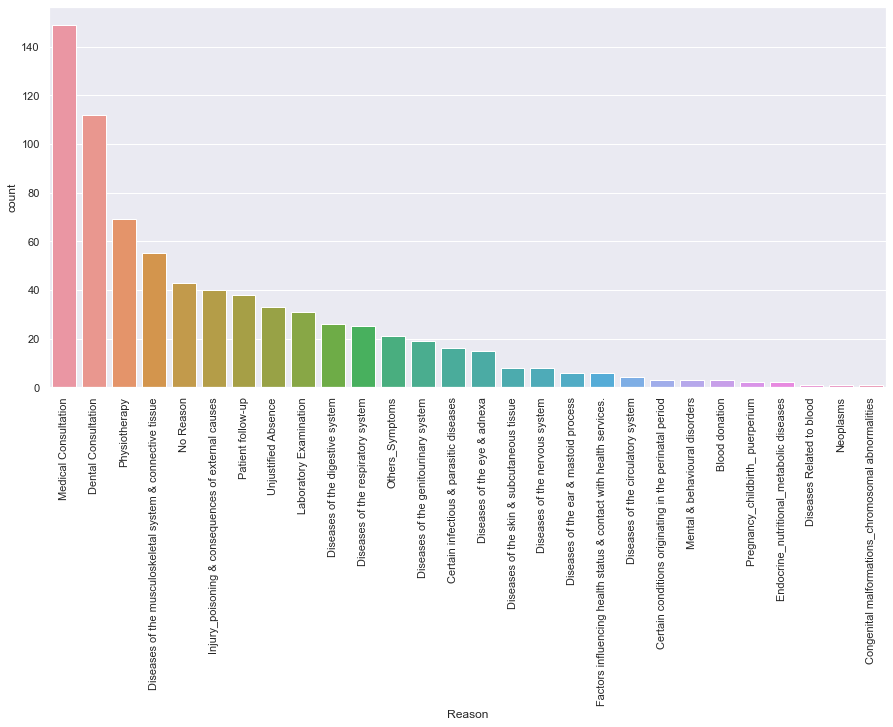

In [48]:
plt.figure(figsize=(15,7))
sn.countplot(df_merg1['Reason'],order=df_merg1['Reason'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Above shows majority of the absent reasons are Medical Consultations and yes 'No Reason' also appears in top 5

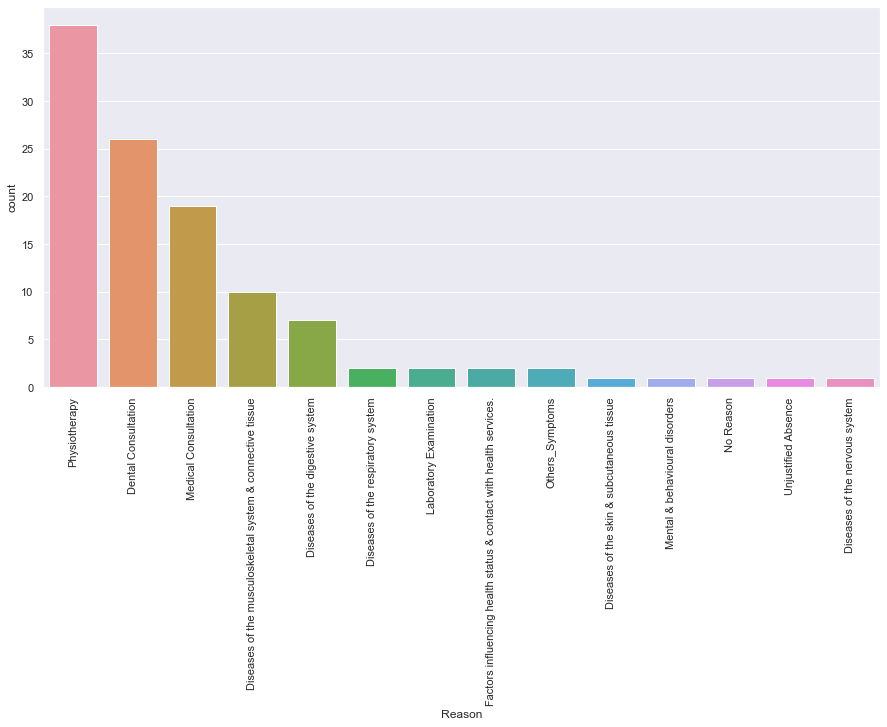

In [49]:
#Lets revisualize for ID=3
plt.figure(figsize=(15,7))
sn.countplot(df_merg1[df_merg1['ID']==3]['Reason'],order=df_merg1[df_merg1['ID']==3]['Reason'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [50]:
#Checking if hours have any correlation with reasons
#1.Check unique absnt hrs
df_all['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

Above Shows wierd hours also like absnt hrs> 16...not sure if its for days ...lets see

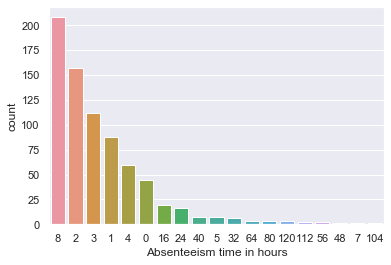

In [51]:

sn.countplot(df_all['Absenteeism time in hours'],order=df_all['Absenteeism time in hours'].value_counts().index)
plt.show()

In [52]:
df_all['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

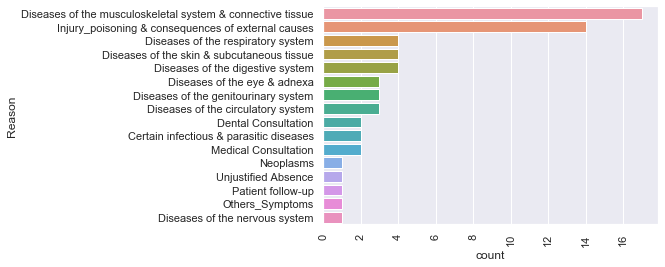

In [53]:
#Lets see what is the frequent reasons for higher hours of absent
sn.countplot(y=df_merg1[df_merg1['Absenteeism time in hours']>8]['Reason'],order=df_merg1[df_merg1['Absenteeism time in hours']>8]['Reason'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

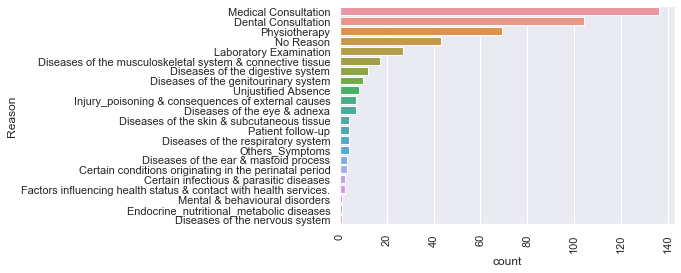

In [54]:
#Lets see what is the frequent reasons for less than 8 hours of absent if any different from above
sn.countplot(y=df_merg1[df_merg1['Absenteeism time in hours']<8]['Reason'],order=df_merg1[df_merg1['Absenteeism time in hours']<8]['Reason'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

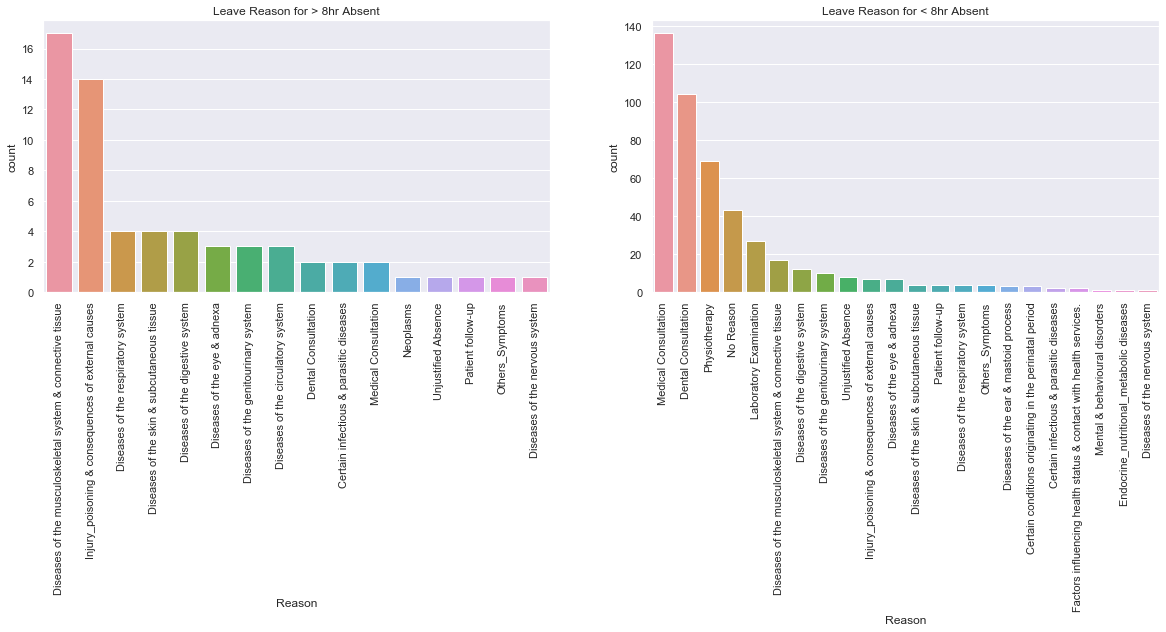

In [55]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sn.countplot(df_merg1[df_merg1['Absenteeism time in hours']>8]['Reason'],order=df_merg1[df_merg1['Absenteeism time in hours']>8]['Reason'].value_counts().index,ax=ax1)
sn.countplot(df_merg1[df_merg1['Absenteeism time in hours']<8]['Reason'],order=df_merg1[df_merg1['Absenteeism time in hours']<8]['Reason'].value_counts().index,ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.title.set_text('Leave Reason for > 8hr Absent')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.title.set_text('Leave Reason for < 8hr Absent')

plt.show()

In [56]:
df_merg1[df_merg1['Absenteeism time in hours']>8]['Reason'].value_counts()

Diseases of the musculoskeletal system & connective tissue    17
Injury_poisoning & consequences of external causes            14
Diseases of the respiratory system                             4
Diseases of the skin & subcutaneous tissue                     4
Diseases of the digestive system                               4
Diseases of the eye & adnexa                                   3
Diseases of the genitourinary system                           3
Diseases of the circulatory system                             3
Dental Consultation                                            2
Certain infectious & parasitic diseases                        2
Medical Consultation                                           2
Neoplasms                                                      1
Unjustified Absence                                            1
Patient follow-up                                              1
Others_Symptoms                                                1
Diseases of the nervous s

In [57]:
df_merg1[df_merg1['Absenteeism time in hours']>8]['Absenteeism time in hours'].value_counts()

16     19
24     16
40      7
32      6
80      3
120     3
64      3
112     2
56      2
104     1
48      1
Name: Absenteeism time in hours, dtype: int64

In [58]:
df_merg1[df_merg1['Absenteeism time in hours']>8]['ID'].value_counts()

14    9
11    7
24    6
3     5
22    5
36    4
20    4
15    4
34    3
18    2
13    2
28    2
9     2
17    1
26    1
10    1
7     1
6     1
5     1
30    1
1     1
Name: ID, dtype: int64

In [59]:
df_merg1.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason_Code,Reason,Reason_Original
0,11,26,7,3,1,289,36,13,33,239.554,...,1,0,1,90,172,30,4,26,Unjustified Absence,Unjustified Absence
1,11,26,10,4,4,289,36,13,33,253.465,...,1,0,1,90,172,30,8,26,Unjustified Absence,Unjustified Absence
2,1,26,12,4,4,235,11,14,37,261.306,...,0,0,1,88,172,29,8,26,Unjustified Absence,Unjustified Absence
3,20,26,12,6,4,260,50,11,36,261.306,...,1,0,0,65,168,23,8,26,Unjustified Absence,Unjustified Absence
4,20,26,3,2,2,260,50,11,36,343.253,...,1,0,0,65,168,23,16,26,Unjustified Absence,Unjustified Absence


In [60]:
df_merg1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason_Code', 'Reason',
       'Reason_Original'],
      dtype='object')

In [61]:
df_merg1.rename(columns={'Work load Average/day ':'Work_load_Average_day'},inplace=True)

In [62]:
df_merg1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work_load_Average_day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason_Code', 'Reason',
       'Reason_Original'],
      dtype='object')

In [63]:
#Lets analyse the data for work load,hit target with reasons and absent hours
#Lets frame a subset dataset
df_rwha=df_merg1[['ID','Reason','Work_load_Average_day','Hit target','Absenteeism time in hours']].copy()

In [64]:
df_rwha.head()

,ID,Reason,Work_load_Average_day,Hit target,Absenteeism time in hours
0,11,Unjustified Absence,239.554,97,4
1,11,Unjustified Absence,253.465,93,8
2,1,Unjustified Absence,261.306,97,8
3,20,Unjustified Absence,261.306,97,8
4,20,Unjustified Absence,343.253,95,16


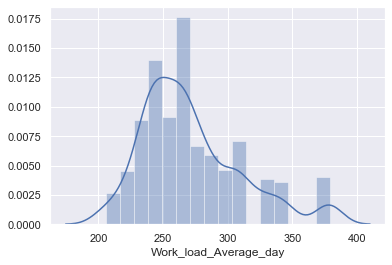

In [65]:
sn.distplot(df_rwha['Work_load_Average_day'])
plt.show()

In [66]:
print(df_rwha['Work_load_Average_day'].describe())

count    740.000000
mean     271.490235
std       39.058116
min      205.917000
25%      244.387000
50%      264.249000
75%      294.217000
max      378.884000
Name: Work_load_Average_day, dtype: float64


Not much of variation in the work load data but we dont know how much ot practicaly means by increase of 1 unit in the work load.
So cannot conclude anything from the data variation on workload..its like human height..data will be from 1 to 6 fit mostly.

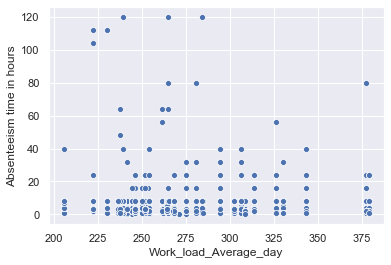

In [67]:
sn.scatterplot(df_rwha['Work_load_Average_day'],df_rwha['Absenteeism time in hours'])

In [68]:
#to check correlation in terms of numbers
from scipy.stats import pearsonr

In [69]:
corr,_=pearsonr(df_rwha['Work_load_Average_day'],df_rwha['Absenteeism time in hours'])

In [70]:
print(corr)

0.024748899704094378


In [71]:
from scipy.stats import spearmanr

In [72]:
scorr,_=spearmanr(df_rwha['Work_load_Average_day'],df_rwha['Absenteeism time in hours'])

In [73]:
print(scorr)

0.011757660968195716


Shows no correlation between Work_load_Average_day & Absenteeism time in hours.
Same is also reflected in the scatter plot...as most of the leave hours are in between 8 & 16 so not much we can say from variations in workloads. Also its practical...not many employees will take very long leaves say more than 2-3 days because of only workloads.

In [74]:
print(df_rwha['Hit target'].describe())

count    740.000000
mean      94.587838
std        3.779313
min       81.000000
25%       93.000000
50%       95.000000
75%       97.000000
max      100.000000
Name: Hit target, dtype: float64


[]

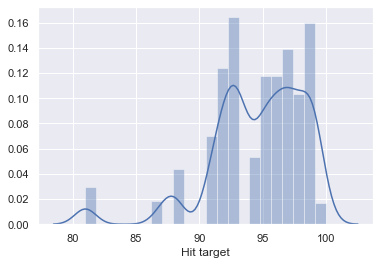

In [75]:
sn.distplot(df_rwha['Hit target'])
plt.plot()

[]

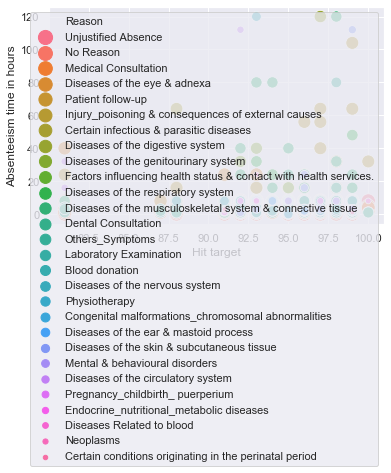

In [76]:
sn.scatterplot(df_rwha['Hit target'],df_rwha['Absenteeism time in hours'],hue=df_rwha['Reason'],size=df_rwha['Reason'],sizes=(20, 200), hue_norm=(0, 7),legend="full")
plt.plot()

In [77]:
df_all.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

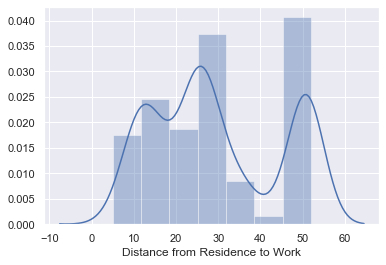

In [78]:
sn.distplot(df_merg1['Distance from Residence to Work'])

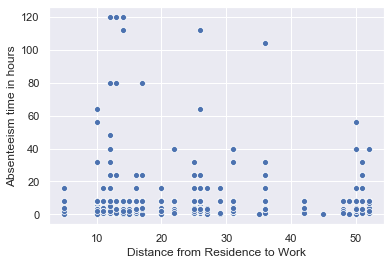

In [79]:
sn.scatterplot(df_merg1['Distance from Residence to Work'],df_merg1['Absenteeism time in hours'])
plt.show()

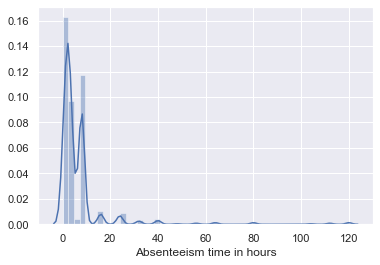

In [80]:
sn.distplot(df_merg1['Absenteeism time in hours'])
plt.show()

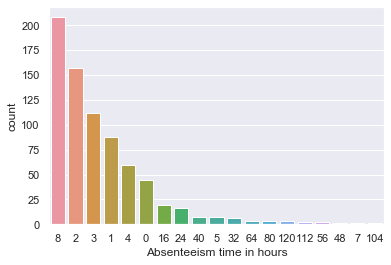

In [81]:
sn.countplot(df_merg1['Absenteeism time in hours'],order=df_merg1['Absenteeism time in hours'].value_counts().index)
plt.show()

In [82]:
df_merg1['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

In [83]:
df_merg1.groupby('Reason').agg({'Absenteeism time in hours':['mean','median','min','max']})

Absenteeism time in hours  \
                                                                        mean   
Reason                                                                         
Blood donation                                                      8.000000   
Certain conditions originating in the perinatal...                  2.000000   
Certain infectious & parasitic diseases                            11.375000   
Congenital malformations_chromosomal abnormalities                  8.000000   
Dental Consultation                                                 2.991071   
Diseases Related to blood                                           8.000000   
Diseases of the circulatory system                                 42.000000   
Diseases of the digestive system                                   11.423077   
Diseases of the ear & mastoid process                               5.333333   
Diseases of the eye & adnexa                                       10.000000   
Diseases of the genitourinary system                                8.789474   
Diseases of the musculoskeletal system & connec...                 15.309091   
Diseases of the nervous system                                     21.375000   
Diseases of the respiratory system                                 11.040000   
Diseases of the skin & subcutaneous tissue                         23.375000   
Endocrine_nutritional_metabolic diseases                            4.500000   
Factors influencing health status & contact wit...                  5.833333   
Injury_poisoning & consequences of external causes                 18.225000   
Laboratory Examination                                              3.483871   
Medical Consultation                                                2.845638   
Mental & behavioural disorders                                      6.333333   
Neoplasms                                                          24.000000   
No Reason                                                           0.000000   
Others_Symptoms                                                    10.333333   
Patient follow-up                                                   7.710526   
Physiotherapy                                                       2.275362   
Pregnancy_childbirth_ puerperium                                    8.000000   
Unjustified Absence                                                 7.272727   

                                                                    
                                                   median min  max  
Reason                                                              
Blood donation                                        8.0   8    8  
Certain conditions originating in the perinatal...    2.0   1    3  
Certain infectious & parasitic diseases               8.0   1   64  
Congenital malformations_chromosomal abnormalities    8.0   8    8  
Dental Consultation                                   2.0   1   24  
Diseases Related to blood                             8.0   8    8  
Diseases of the circulatory system                   24.0   8  112  
Diseases of the digestive system                      8.0   1  120  
Diseases of the ear & mastoid process                 5.5   2    8  
Diseases of the eye & adnexa                          8.0   1   40  
Diseases of the genitourinary system                  4.0   2   40  
Diseases of the musculoskeletal system & connec...    8.0   1  120  
Diseases of the nervous system                        8.0   3  120  
Diseases of the respiratory system                    8.0   2   48  
Diseases of the skin & subcutaneous tissue           10.0   1  112  
Endocrine_nutritional_metabolic diseases              4.5   1    8  
Factors influencing health status & contact wit...    8.0   1    8  
Injury_poisoning & consequences of external causes    8.0   1  104  
Laboratory Examination                                3.0   1    8  
Medical Consultation                                

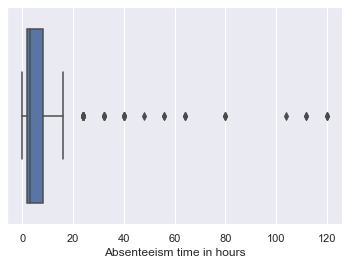

In [84]:
sn.boxplot(df_merg1['Absenteeism time in hours'])
plt.show()

In [85]:
df_merg1['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [86]:
df_merg1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work_load_Average_day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason_Code', 'Reason',
       'Reason_Original'],
      dtype='object')

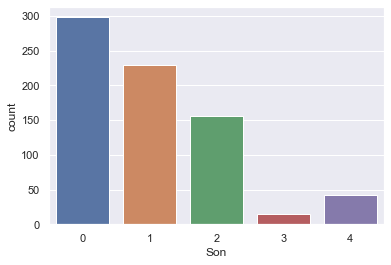

In [87]:
sn.countplot(df_merg1.Son)

In [88]:
df_merg1.groupby('Son').agg({'Absenteeism time in hours':['mean','median','min','max']})

Absenteeism time in hours                
                         mean median min  max
Son                                          
0                    5.385906      3   0   64
1                    6.030568      3   0  120
2                   10.570513      8   0  120
3                   12.200000      8   0   80
4                    7.285714      4   0   56

In [89]:
df_son=df_merg1.groupby('Son').agg({'Absenteeism time in hours':['mean','median','min','max']})

In [90]:
df_son.head()

Absenteeism time in hours                
                         mean median min  max
Son                                          
0                    5.385906      3   0   64
1                    6.030568      3   0  120
2                   10.570513      8   0  120
3                   12.200000      8   0   80
4                    7.285714      4   0   56

In [91]:
df_son.columns

MultiIndex(levels=[['Absenteeism time in hours'], ['mean', 'median', 'min', 'max']],
           codes=[[0, 0, 0, 0], [0, 1, 2, 3]])

In [92]:
#sn.barplot(df_son.index,df_son[['Absenteeism time in hours'][0]])

In [93]:
df_merg1.groupby('Education').agg({'Absenteeism time in hours':['mean','median','min','max']})

Absenteeism time in hours                
                               mean median min  max
Education                                          
1                          7.189853    3.0   0  120
2                          6.391304    8.0   0   40
3                          5.265823    3.0   0   64
4                          5.250000    5.5   2    8

In [94]:
df_merg1[df_merg1['Absenteeism time in hours']==0]['Reason'].value_counts()

No Reason        43
Physiotherapy     1
Name: Reason, dtype: int64

In [95]:
df_merg1[df_merg1['Absenteeism time in hours']==0]['Disciplinary failure'].value_counts()

1    40
0     4
Name: Disciplinary failure, dtype: int64

In [96]:
df_merg1[df_merg1['Reason']=='No Reason']['Disciplinary failure'].value_counts()

1    40
0     3
Name: Disciplinary failure, dtype: int64

In [97]:
df_merg1[df_merg1['Reason']=='Unjustified Absence'].shape

(33, 24)

In [98]:
df_merg1[df_merg1['Reason']=='Unjustified Absence']['Disciplinary failure'].value_counts()

0    33
Name: Disciplinary failure, dtype: int64

Was thinking if we can combine leave reason with Unjustified Absence with leaves with No reason. But then 
again could see for no reason leaves we have disiplinary actions taken but for unjustified leaves no disciplinary action.

In [99]:
df_merg1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work_load_Average_day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason_Code', 'Reason',
       'Reason_Original'],
      dtype='object')

In [100]:
#created a sample data subset to try modelling
df_ml_1=df_merg1[['Reason for absence','Distance from Residence to Work','Education','Son','Social smoker','Absenteeism time in hours']].copy()

In [101]:
df_ml_1.shape

(740, 6)

In [102]:
df_ml_1.head()

,Reason for absence,Distance from Residence to Work,Education,Son,Social smoker,Absenteeism time in hours
0,26,36,1,2,0,4
1,26,36,1,2,0,8
2,26,11,3,1,0,8
3,26,50,1,4,0,8
4,26,50,1,4,0,16


In [103]:
df_ml_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 739
Data columns (total 6 columns):
Reason for absence                 740 non-null int64
Distance from Residence to Work    740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social smoker                      740 non-null int64
Absenteeism time in hours          740 non-null int64
dtypes: int64(6)
memory usage: 40.5 KB


In [104]:
df_merg1['Reason'].value_counts()

Medical Consultation                                                 149
Dental Consultation                                                  112
Physiotherapy                                                         69
Diseases of the musculoskeletal system & connective tissue            55
No Reason                                                             43
Injury_poisoning & consequences of external causes                    40
Patient follow-up                                                     38
Unjustified Absence                                                   33
Laboratory Examination                                                31
Diseases of the digestive system                                      26
Diseases of the respiratory system                                    25
Others_Symptoms                                                       21
Diseases of the genitourinary system                                  19
Certain infectious & parasitic diseases            

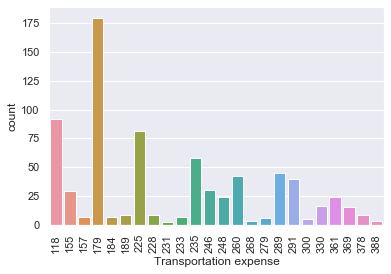

In [105]:
sn.countplot(df_merg1['Transportation expense'])
plt.xticks(rotation=90)
plt.show()

C:\Users\subra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


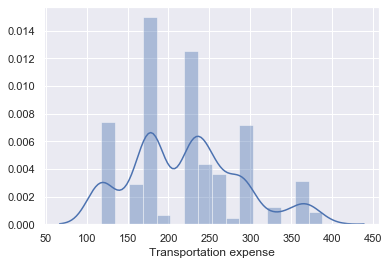

In [106]:
sn.distplot(df_merg1['Transportation expense'])
plt.show()

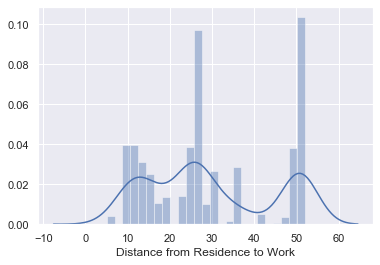

In [107]:
sn.distplot(df_merg1['Distance from Residence to Work'],bins=25)
plt.show()

In [108]:
df_merg1[df_merg1['Distance from Residence to Work']<=0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work_load_Average_day,...,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason_Code,Reason,Reason_Original


In [109]:
time_bin=[]
for i in df_merg1['Absenteeism time in hours']:
    if i >=0 and i <=2:
        time_bin.append('0-2 hrs')
    elif i>2 and i<=4:
        time_bin.append('2-4 hrs')
    elif i>4 and i<=8:
        time_bin.append('4-8 hrs')
    elif i>8 and i<=24:
        time_bin.append('8-24 hrs')
    else:
        time_bin.append('Greater than 24 hrs')

In [110]:
len(time_bin)

740

In [111]:
df_merg1['Absnt_hr_estimate']=time_bin

In [112]:
df_merg1.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work_load_Average_day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason_Code', 'Reason', 'Reason_Original',
       'Absnt_hr_estimate'],
      dtype='object')

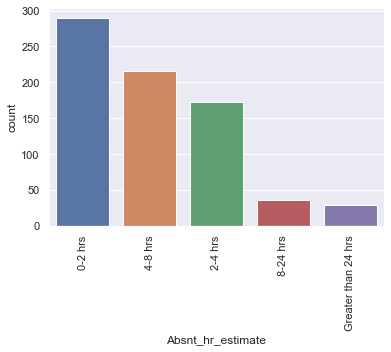

In [113]:
sn.countplot(df_merg1.Absnt_hr_estimate,order=df_merg1.Absnt_hr_estimate.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [114]:
df_ml2=df_merg1[['Reason for absence','Transportation expense','Distance from Residence to Work','Age','Education','Social smoker','Body mass index','Absnt_hr_estimate']].copy()

In [115]:
df_ml2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 739
Data columns (total 8 columns):
Reason for absence                 740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Age                                740 non-null int64
Education                          740 non-null int64
Social smoker                      740 non-null int64
Body mass index                    740 non-null int64
Absnt_hr_estimate                  740 non-null object
dtypes: int64(7), object(1)
memory usage: 52.0+ KB


In [116]:
df_ml2.head()

,Reason for absence,Transportation expense,Distance from Residence to Work,Age,Education,Social smoker,Body mass index,Absnt_hr_estimate
0,26,289,36,33,1,0,30,2-4 hrs
1,26,289,36,33,1,0,30,4-8 hrs
2,26,235,11,37,3,0,29,4-8 hrs
3,26,260,50,36,1,0,23,4-8 hrs
4,26,260,50,36,1,0,23,8-24 hrs


[]

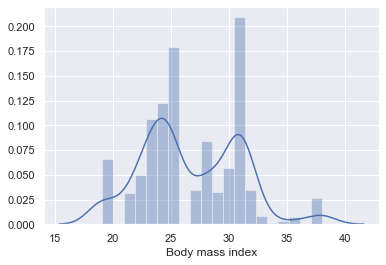

In [117]:
sn.distplot(df_ml2['Body mass index'],bins=20)
plt.plot()

In [118]:
df_ml2['Body mass index'].describe()

count    740.000000
mean      26.677027
std        4.285452
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64

[]

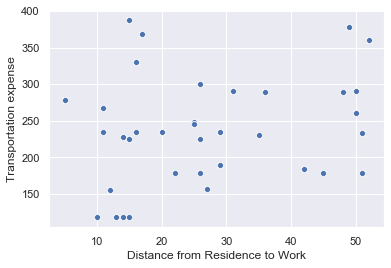

In [119]:
sn.scatterplot(df_ml2['Distance from Residence to Work'],df_ml2['Transportation expense'])
plt.plot()

[]

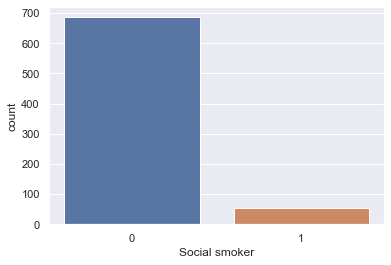

In [120]:
sn.countplot(df_ml2['Social smoker'])
plt.plot()

[]

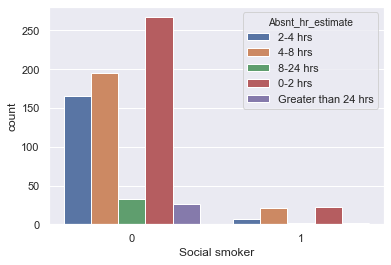

In [121]:
sn.countplot(df_ml2['Social smoker'],hue=df_ml2['Absnt_hr_estimate'])
plt.plot()

[]

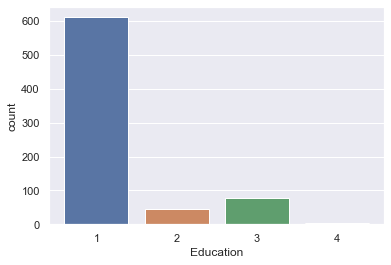

In [122]:
sn.countplot(df_ml2['Education'])
plt.plot()

[]

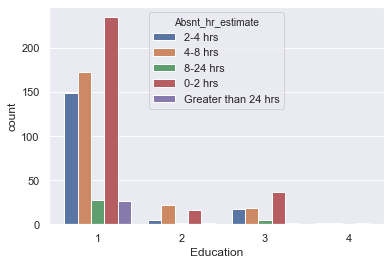

In [123]:
sn.countplot(df_ml2['Education'],hue=df_ml2['Absnt_hr_estimate'])
plt.plot()

In [124]:
##Lets try model
X=df_ml2[['Reason for absence','Distance from Residence to Work','Body mass index']]

In [125]:
X.head()

,Reason for absence,Distance from Residence to Work,Body mass index
0,26,36,30
1,26,36,30
2,26,11,29
3,26,50,23
4,26,50,23


In [126]:
y=df_ml2.Absnt_hr_estimate

In [127]:
y.head()

0     2-4 hrs
1     4-8 hrs
2     4-8 hrs
3     4-8 hrs
4    8-24 hrs
Name: Absnt_hr_estimate, dtype: object

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [129]:
RF_clf=RandomForestClassifier(random_state=42)
LR_clf=LogisticRegression( max_iter=1000)

In [130]:
RF_scores=cross_val_score(RF_clf,X,y,cv=5)

In [131]:
print('scores: ',RF_scores)

scores:  [0.18918919 0.48648649 0.36486486 0.27702703 0.24324324]


In [132]:
print('Mean Accuracy of RandomForest Classifier :', RF_scores.mean())

Mean Accuracy of RandomForest Classifier : 0.31216216216216214


In [133]:
LR_scores=cross_val_score(LR_clf,X,y,cv=5)

In [134]:
print('scores: ',LR_scores)

scores:  [0.16891892 0.38513514 0.52027027 0.40540541 0.39864865]


In [135]:
print('Mean Accuracy of LogisticRegression Classifier :', LR_scores.mean())

Mean Accuracy of LogisticRegression Classifier : 0.3756756756756757


In [136]:
lf_clf=LogisticRegression(max_iter=1000)

In [137]:
lf_clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Export Model

In [138]:
import pickle

In [139]:
#saving the model 
LR_model_1=pickle.dumps(lf_clf)

In [140]:
# Load the pickled model 
Lr_from_pickle=pickle.loads(LR_model_1)

In [141]:
Lr_from_pickle.predict([[26,36,30]])

array(['0-2 hrs'], dtype=object)

In [142]:
from sklearn.externals  import joblib

C:\Users\subra\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [143]:
import joblib

In [144]:
joblib.dump(lf_clf,'Absent_Hour_Predictor_model.ml')

['Absent_Hour_Predictor_model.ml']

In [145]:
model=joblib.load('Absent_Hour_Predictor_model.ml')

In [146]:
model.predict([[26,36,30]])

array(['0-2 hrs'], dtype=object)